# Предобработка текста

## Часть 1

### Токенизация

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [ ]:
print(sent_tokenize("I was going home when she rung. It was a surprise."))

['I was going home when she rung.', 'It was a surprise.']


[<img src="https://raw.githubusercontent.com/natasha/natasha-logos/master/natasha.svg">](https://github.com/natasha/natasha)

[Razdel](https://natasha.github.io/razdel/)

In [ ]:
!pip install -q razdel

In [ ]:
from razdel import tokenize, sentenize
text = 'Кружка-термос на 0.5л (50/64 см³, 516;...)'
list(tokenize(text))

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

#### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

In [ ]:
import re
word = 'supercalifragilisticexpialidocious'
re.findall('[abc]|up|super', word)

['super', 'c', 'a', 'a', 'c', 'a', 'c']

In [ ]:
re.findall('\d{1,3}', 'These are some numbers: 49 and 432312')

['49', '432', '312']

In [ ]:
re.sub('[,\.?!]','','How, to? split. text!')

'How to split text'

In [ ]:
re.sub('[^A-z]',' ','I 123 can 45 play 67 football').split()

['I', 'can', 'play', 'football']

### Удаление неинформативных слов

#### N-граммы

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [ ]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('all',), ('work',), ('and',), ('no',), ('play',)]
[('all', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [ ]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common(5))
print('Популярные биграммы: ', FreqDist(bigram).most_common(5))

Популярные униграммы:  [(('all',), 2), (('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2)]
Популярные биграммы:  [(('all', 'work'), 2), (('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('play', 'makes'), 1)]


#### Стоп-слова

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'myself', 'how', 'but', 'ourselves', 'wasn', 'her', 'being', "shan't", 'just', 'it', "aren't", 'him', "you've", 'himself', 'been', 've', 'up', "wouldn't", 'through', 'yours', 'these', 'between', 'from', 'are', 'because', 'if', 'which', 'own', 'during', "wasn't", 'be', 's', "won't", 'those', 'again', 'll', 'don', 'them', 'ain', 'have', 'their', 'weren', 'has', 'as', 're', 'my', 'to', 'what', 'your', 'itself', 'shouldn', 'some', 'off', 'wouldn', "doesn't", 'an', 'is', 'having', 'too', 'a', 'such', 'here', 'yourself', "should've", 'didn', 'and', 'was', 'most', 'when', 'hasn', 'themselves', 'above', 'mustn', 'by', 'i', 'where', 'no', "weren't", 'he', 'theirs', "hasn't", 'isn', 'under', 'did', 'our', "mightn't", "shouldn't", 'of', 'you', 'couldn', 'can', 'does', "you'd", 'about', 'further', 'needn', 'after', 'ours', "haven't", 'into', 'his', 'against', 'd', 'o', 'with', 'very', "didn't", 'out', 'doesn', 'ma', 'while', 'herself', 'y', 'the', 'each', 'won', 'then', 'both', 'aren', 'mightn', 

In [ ]:
print([word for word in tokens if word not in stopWords])

['work', 'play', 'makes', 'jack', 'dull', 'boy', ',', 'work', 'play']


In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Стемминг vs Лемматизация
* ‘Caring’ -> Лемматизация -> ‘Care’
* ‘Caring’ -> Стемминг -> ‘Car’

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [ ]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [ ]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

raw_ru = """Не существует научных доказательств в пользу эффективности НЛП, оно
признано псевдонаукой. Систематические обзоры указывают, что НЛП основано на
устаревших представлениях об устройстве мозга, несовместимо с современной
неврологией и содержит ряд фактических ошибок."""

In [ ]:
!pip install -q pymorphy2

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 8.2MB 7.4MB/s 


In [ ]:
# 1
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
pymorphy_results = list(map(lambda x: morph.parse(x), raw_ru.split(' ')))
print(' '.join([res[0].normal_form for res in pymorphy_results]))

не существовать научный доказательство в польза эффективность нлп, оно 
признать псевдонаукой. систематический обзор указывают, что нлп основать на 
устаревший представление о устройство мозга, несовместимый с современный 
неврология и содержать ряд фактический ошибок.


In [ ]:
# 2
import spacy
nlp = spacy.load('en')
spacy_results = nlp(raw)
print(' '.join([token.lemma_ for token in spacy_results]))

denni : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


[Сравнение PyMorphy2 и PyMystem3](https://habr.com/ru/post/503420/)

### Part-of-Speech

In [ ]:
# 1
[(res[0].normal_form, res[0].tag) for res in pymorphy_results[:9]]

[('не', OpencorporaTag('PRCL')),
 ('существовать', OpencorporaTag('VERB,impf,intr sing,3per,pres,indc')),
 ('научный', OpencorporaTag('ADJF,Qual plur,gent')),
 ('доказательство', OpencorporaTag('NOUN,inan,neut plur,gent')),
 ('в', OpencorporaTag('PREP')),
 ('польза', OpencorporaTag('NOUN,inan,femn sing,accs')),
 ('эффективность', OpencorporaTag('NOUN,inan,femn sing,gent')),
 ('нлп,', OpencorporaTag('UNKN')),
 ('оно', OpencorporaTag('NPRO,neut,3per,Anph sing,nomn'))]

In [ ]:
# 2
[(token.lemma_, token.pos_) for token in spacy_results[:7]]

[('denni', 'NOUN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

In [ ]:
!pip install -q rnnmorph

     |████████████████████████████████| 10.5MB 6.2MB/s 


In [ ]:
# 3
from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="ru")
rnnmorph_result = predictor.predict(raw_ru.split(' '))
[(token.normal_form, token.pos, token.tag) for token in rnnmorph_result[:7]]

[('не', 'PART', '_'),
 ('существовать',
  'VERB',
  'Mood=Ind|Number=Sing|Person=3|Tense=Notpast|VerbForm=Fin|Voice=Act'),
 ('научный', 'ADJ', 'Case=Gen|Degree=Pos|Number=Plur'),
 ('доказательство', 'NOUN', 'Case=Gen|Gender=Neut|Number=Plur'),
 ('в', 'ADP', '_'),
 ('польза', 'NOUN', 'Case=Acc|Gender=Fem|Number=Sing'),
 ('эффективность', 'NOUN', 'Case=Gen|Gender=Fem|Number=Sing')]

### Named entities recognition

In [ ]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


## Часть 2

### Задача классификации

#### 20 newsgroups
Датасет с 18000 новостей, сгруппированных по 20 темам.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [ ]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
newsgroups_train.filenames.shape

(11314,)

#### Выполните классификацию текста на подвыборке из 4 тем новостей 3 методами машинного обучения. <br>В качестве метрики возьмите матрицу ошибок. <br>Сделайте выводы по полученным результатам

ВЫПОЛНЕНО ТРИ МЕТОДА:

1. МЕТОД ОПОРНЫХ ВЕКТОРОВ
2. БАЙЕСОВСКИЙ КЛАССИФИКАТОР
3. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

ВЫВОДЫ: Наглядные выводы о том, какие предсказания оказались верными можно посмотреть на графике. Вывод о том, какой метод лучше всего классифицировал данные из датасета это МЕТОД ОПОРНЫХ ВЕКТОРОВ.
Все три метода тем не менее показали неплохие результаты, в особенности Логистическая регрессия и Метод опорных векторов.


In [ ]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
newsgroups_train.filenames.shape

(2034,)

In [ ]:
print(newsgroups_train.data[0])

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

data = fetch_20newsgroups(categories=categories)

# Преобразование текстовых данных в векторы признаков используя TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.data)

X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Вычисление точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Отчет классификации
classification_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\
", classification_report)

Accuracy: 0.941031941031941
Classification Report:                     precision    recall  f1-score   support

       alt.atheism       0.98      0.92      0.95        92
     comp.graphics       0.89      0.99      0.94       121
         sci.space       0.97      0.96      0.97       120
talk.religion.misc       0.94      0.85      0.89        74

          accuracy                           0.94       407
         macro avg       0.95      0.93      0.94       407
      weighted avg       0.94      0.94      0.94       407



In [ ]:
d = confusion_matrix(y_test, y_pred)

<Axes: >

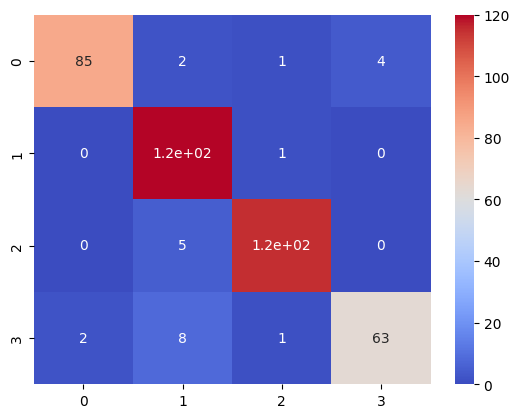

In [ ]:
import seaborn
seaborn.heatmap(d, annot= True, cmap="coolwarm")

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Вычисление точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8574938574938575


In [ ]:
d = confusion_matrix(y_test, y_pred)

<Axes: >

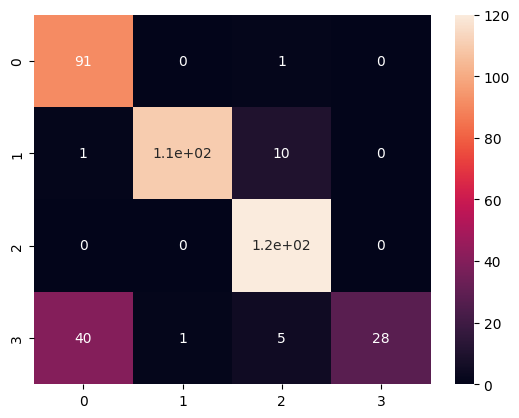

In [ ]:
seaborn.heatmap(d, annot= True)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Вычисление точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9262899262899262


In [ ]:
d = confusion_matrix(y_test, y_pred)

<Axes: >

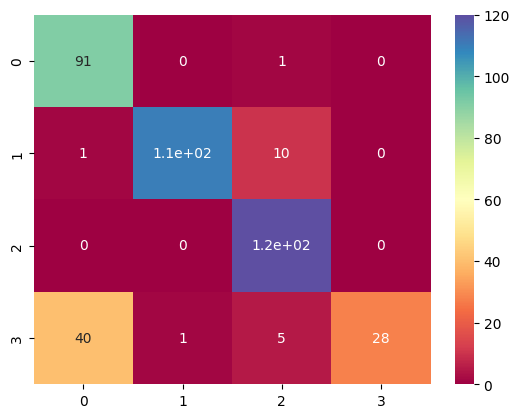

In [ ]:
seaborn.heatmap(d, annot= True, cmap="Spectral")